# Proyek Analisis Data: E-Commerce Public 
- **Nama:** Hendratara Pratama
- **Email:** thyrus652@gmail.com
- **ID Dicoding:** hendratara_pratama

*based on myself analysis

## Menentukan Pertanyaan Bisnis

- Kenapa klien membatalkan pesanannya?
- Berapa banyak penghasilan dalam tahun terakhir?
- Berapa rata rata lama waktu yang dibutuhkan agar produk sampai ke customer
- How much store average rating, and why customers give bad ratings?
- Berapa rata rata rating toko? dan kenapa pelanggan memberi rating buruk
- Kategori apa yang paling banyak dijual?
- Dimana kota/negara dengan pelanggan paling banyak?

### Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: [www.olist.com](www.olist.com)

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### From this dataset we can ask:
1. Why client cancelled his/her order?
2. How much income in a last year?
3. How long usually does product takes to arrive at the customers?
4. How much store average rating, and why customers give bad ratings?
5. What the most category sells?
6. Which city/state the most customers live?

### Product Example
![Product Example](product_example.png)

### Data Schema
![Data Schema](data_schema.png)

## Import Semua Packages/Library yang Digunakan

In [1]:
# Processing Data Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Systems
import os
import pathlib

In [2]:
# Use Style on Matplotlib
plt.style.use('ggplot')

# Use Style on SNS
sns.set_theme(style="whitegrid")

## Data Wrangling

Data wrangling covers with:
1. Gathering data
2. Assessing data
3. Cleaning data

### Gathering Data

Dataset used are from [E-Commerce Public Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) and already downloaded in project directory

In [3]:
# Define Dataset Directory
dataset_dir = "./data"

# See Datasets
os.listdir(dataset_dir)

['order_payments_dataset.csv',
 'New Text Document.txt',
 'product_category_name_translation.csv',
 'orders_dataset.csv',
 'order_items_dataset.csv',
 'order_reviews_dataset.csv',
 'sellers_dataset.csv',
 'geolocation_dataset.csv',
 'products_dataset.csv',
 'customers_dataset.csv']

In [4]:
order_payments_df = pd.read_csv(f"{dataset_dir}/order_payments_dataset.csv")
product_cat_df = pd.read_csv(f"{dataset_dir}/product_category_name_translation.csv")
orders_df = pd.read_csv(f"{dataset_dir}/orders_dataset.csv")
order_items_df = pd.read_csv(f"{dataset_dir}/order_items_dataset.csv")
order_reviews_df = pd.read_csv(f"{dataset_dir}/order_reviews_dataset.csv")
sellers_df = pd.read_csv(f"{dataset_dir}/sellers_dataset.csv")
products_df = pd.read_csv(f"{dataset_dir}/products_dataset.csv")
customers_df = pd.read_csv(f"{dataset_dir}/customers_dataset.csv")

In [5]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
product_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Asessing Data

Based on Data Gathering section, the columns included each dataframe are:

__order_payments_df__
- order_id
- payment_sequential
- payment_type
- payment_installments
- payment_value

__product_cat_df__
- product_category_name
- product_category_name_english

__orders_df__
- order_id
- customer_id
- order_status
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

__order_items_df__
- order_id
- order_item_id
- product_id
- seller_id
- shipping_limit_date
- price
- freight_value

__order_reviews_df__
- review_id
- order_id
- review_score
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp

__sellers_df__
- seller_id
- seller_zip_code_prefix
- seller_city
- seller_state

__geolocation_df__
- geolocation_zip_code_prefix
- geolocation_lat
- geolocation_lng
- geolocation_city
- geolocation_state

__products_df__
- product_id
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

__customers_df__
- customer_id
- customer_unique_id
- customer_zip_code_prefix
- customer_city
- customer_state

#### Check order_payments_df

In [13]:
# Data Information
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [14]:
# Statistical Info
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [15]:
# Duplicated Value
print("Duplicated: ", order_payments_df.duplicated().sum())

Duplicated:  0


In [16]:
# Check Max Payemnt Value
order_payments_df.sort_values(by='payment_value', ascending=False).head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


#### Check product_cat_df

In [17]:
# Data Information
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [18]:
# Statistical Info
product_cat_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [19]:
# Duplicated Value
print("Duplicated: ", product_cat_df.duplicated().sum())

Duplicated:  0


#### Check orders_df

In [20]:
# Data Information
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
# Statistical Info
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [22]:
# Missing Value
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [23]:
# Diplicated Value
print("Duplicated: ", orders_df.duplicated().sum())

Duplicated:  0


In [24]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

#### Check order_items_df

In [25]:
# Data Information
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
# Statistical Info
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [27]:
# Duplicated Value
print("Duplicated: ", order_items_df.duplicated().sum())

Duplicated:  0


#### Check order_reviews_df

In [28]:
# Data Information
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
# Statistical Info
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [30]:
# Missing Value
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [31]:
# Duplicated Value
print("Duplicated Review ID: ", order_reviews_df["review_id"].duplicated().sum())
print("Duplicated: ", order_reviews_df.duplicated().sum())

Duplicated Review ID:  814
Duplicated:  0


#### Check sellers_df

In [32]:
# Data Information
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [33]:
# Statistical Info
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [34]:
# Duplicated Value
print("Duplicated: ", sellers_df.duplicated().sum())

Duplicated:  0


#### Check products_df

In [35]:
# Data Information
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
# Statistical Info
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [37]:
# Missing Value
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [38]:
# Duplicated Value
print("Duplicated: ", products_df.duplicated().sum())

Duplicated:  0


#### Check customers_df

In [39]:
# Data Information
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [40]:
# Statistical Info
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [41]:
# Duplicated Value
print("Duplicated: ", customers_df.duplicated().sum())

Duplicated:  0


### Cleaning Data

Based on data Assessing section, it can be concluded that:

| Dataframe | Missing Value | Duplicated | Data Type |
|-----------|---------------|------------|-----------|
| orders_df | order_approved_at => 160<br>order_delivered_carrier_date => 1783<br>order_delivered_customer_date => 2965 | | order_purchase_timestamp => object<br>order_approved_at => object<br>order_delivered_carrier_date => object<br>order_delivered_customer_date => object<br>order_estimated_delivery_date => object |
| order_items_df | | | shipping_limit_date => object |
| order_reviews_df | review_comment_title => 87656<br>review_comment_message => 58247 | review_id => 814 | review_creation_date => object<br>review_answer_timestamp => object |
| products_df | product_category_name => 610<br>product_name_lenght => 610<br>product_description_lenght => 610<br>product_photos_qty=> 610<br>product_weight_g => 2<br>product_length_cm => 2<br>product_height_cm => 2<br>product_width_cm => 2 | | |

#### Cleaning orders_df

Change data type into Datetime

In [42]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                   'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

Handling Missing Value

In [43]:
orders_df[orders_df['order_approved_at'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


NaT order_approved_at is cancelled order_status

In [44]:
orders_df[orders_df['order_delivered_carrier_date'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


NaT order_delivered_carrier_date is cancelled, processing, invoiced, unavailable order_status

In [45]:
orders_df[orders_df['order_delivered_customer_date'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


NaT order_delivered_carrier_date is cancelled, processing, invoiced, unavailable, shipped order_status

In [46]:
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
59598,62d3014a7e5b4f51c5f2bb713775aada,041318f3b224ed1865ecbd61cbd4c77b,delivered,2017-05-21 15:57:33,2017-05-21 16:10:12,2017-05-22 18:34:56,2017-05-30 10:52:27,2017-06-26
28033,56a879c57a3b6118c13d30799d1ae6a2,e91dcb655cec02c3277a5c66bac74e04,delivered,2018-04-19 23:00:36,2018-04-20 00:16:36,2018-04-20 18:53:29,2018-04-26 18:12:38,2018-05-22
81687,db20f0c71fd126ce34d0b209e634f3d7,8f3c4de156b6dce86dc7e761a66270b9,delivered,2017-08-04 20:28:26,2017-08-04 20:45:15,2017-08-18 20:02:35,2017-09-04 17:46:34,2017-08-28
9930,c571e33a662a6379681a73ca764dc4e4,e0f4b0b83c7a96648a38e1f0820ce120,delivered,2018-08-17 12:16:27,2018-08-17 12:30:29,2018-08-20 14:30:00,2018-08-29 23:06:27,2018-10-01
84324,dc0ca34b53f7a8ca4217e1dd6b32496e,c5e9fffc86cfd08b334b8926e15212ec,delivered,2018-05-22 12:43:25,2018-05-22 12:56:29,2018-05-23 13:41:00,2018-06-07 20:18:51,2018-06-14
38342,3538ead6f9b48a09ea5f84cce99614f1,946e503ea55c7d86c408ce554593be1a,delivered,2017-10-07 22:33:52,2017-10-07 22:49:14,2017-10-10 15:48:25,2017-10-14 08:10:04,2017-10-26
94980,2d0d4075ded592212bcd5e5bc561b406,ad4fdd8ba1535077790107fc697fbe97,delivered,2017-04-26 12:22:32,2017-04-26 13:06:25,2017-04-26 13:01:25,2017-05-15 07:38:03,2017-05-25
95145,9b96c33e47ad3e23f341f8ca340f63ff,fcb99b368b1a2403b7219f4c8d48d60b,delivered,2018-04-28 11:28:40,2018-04-28 11:50:52,2018-04-30 07:37:00,2018-05-04 10:22:13,2018-05-21
26658,69aeb590d8f4455ab0bb6b95154c2742,d11cf65608cde4907102879070a75f70,delivered,2017-08-29 23:15:51,2017-08-29 23:25:33,2017-08-31 17:23:08,2017-09-04 18:28:09,2017-09-15
51286,8661a555bc977c9f38488801be332bb4,939f659b74bb69ce5a0a7c3b3e351a28,delivered,2018-08-13 21:17:50,2018-08-15 03:15:26,2018-08-15 13:54:00,2018-08-22 16:32:24,2018-09-03


Because we doesnt use this cancelled, we just drop order_approved_at, and fill the rest with:

- order_delivered_carrier_date => (same as order_approved_at + 1 hour if < 16:00:00) and (same as order_approved_at + 1 day if >= 16:00:00)
- order_delivered_customer_date => Mode($order\_delivered\_customer\_date - order\_delivered\_carrier\_date$)

In [47]:
# Remove Missing value in order_approved_at
orders_df = orders_df.dropna(subset=['order_approved_at']).reset_index(drop=True)

In [48]:
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
26022,b40f10c37590cd802e26b93d102f7767,b9a29b8b3d3a8e6f24bca58de7c25693,delivered,2018-02-01 18:14:13,2018-02-01 19:01:13,2018-02-09 23:28:55,2018-02-15 22:07:01,2018-03-02
82557,8145677825a046ef68ff103a47a8be48,a1b2e97bc4df82fe88776276afc2c721,delivered,2018-05-09 06:16:38,2018-05-11 02:57:45,2018-05-12 08:18:00,2018-05-16 18:52:04,2018-05-18
8616,610d2254a191363a1f87185789c63231,78ff015a8c2dee2e054b33ac52bac13f,delivered,2018-04-30 00:58:50,2018-05-03 04:52:36,2018-05-03 14:40:00,2018-05-10 21:38:49,2018-05-21
58191,1e7aa16222b1c59810585e0dc2bf73ed,ddb4dbe493f605112185f028ef0564a1,delivered,2018-04-04 21:59:35,2018-04-05 12:30:13,2018-04-05 22:56:40,2018-04-24 21:12:32,2018-04-24
68550,b30b24f06aaf93a002acff534e7bddff,acc6a0bb583b78406eea9ca0e283ee0e,delivered,2018-01-18 14:04:16,2018-01-19 02:36:59,2018-01-19 20:25:34,2018-01-31 21:12:54,2018-02-02
23245,91663d2b599bc34de8a6c4993c5ffd0b,648e26ec05cfd8f8bb433e04a1c648cd,delivered,2018-03-21 13:29:51,2018-03-21 13:48:02,2018-03-22 19:51:27,2018-04-16 22:03:24,2018-04-20
98982,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26
14598,4576ccc69bb4a9402048a8672467675b,d51a769f71cfbad7bed52a8e4b3d1ceb,delivered,2017-11-27 08:18:47,2017-11-27 08:36:53,2017-11-30 22:44:51,2017-12-03 15:33:25,2017-12-12
77740,4636f82a7026844a74730ee1cf478e97,059ba2888199d4f7b4361686f67044d4,delivered,2018-05-08 20:41:12,2018-05-08 21:11:51,2018-05-09 16:34:00,2018-05-15 20:04:17,2018-05-25
33048,55dfff244bc5d5f81d58d4148062c9b6,94a06f5121bb1ef07a8be5ee510024ef,shipped,2017-05-01 08:29:14,2017-05-01 08:42:22,2017-05-03 11:16:33,NaT,2017-06-08


In [49]:
# impute into order_delivered_carrier_date
start_time = "16:00:00"

for i, row in orders_df.iterrows():
    if (row['order_delivered_carrier_date'] is pd.NaT) and row['order_approved_at'].time() >= pd.Timestamp(start_time).time():
        orders_df.iloc[i, 5] = orders_df.iloc[i, 4] + pd.Timedelta(days=1)
    if (row['order_delivered_carrier_date'] is pd.NaT) and row['order_approved_at'].time() < pd.Timestamp(start_time).time():
        orders_df.iloc[i, 5] = orders_df.iloc[i, 4] + pd.Timedelta(hours=1)

In [50]:
# Calculate mean of delivery time
no_null_time = orders_df[~orders_df['order_delivered_customer_date'].isna()]
no_null_time = no_null_time[['order_delivered_customer_date', 'order_delivered_carrier_date']]
time_diff = no_null_time["order_delivered_customer_date"] - no_null_time["order_delivered_carrier_date"]
mode_time_diff = time_diff.mode()
mode_time_diff

0   3 days
dtype: timedelta64[ns]

Post product arrive in 3 days

In [51]:
# Impute to order_delivered_customer_date
for i, row in orders_df.iterrows():
    if (row['order_delivered_customer_date'] is pd.NaT):
        orders_df.iloc[i, 6] = orders_df.iloc[i, 5] + mode_time_diff

In [52]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [53]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99281 entries, 0 to 99280
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99281 non-null  datetime64[ns]
 6   order_delivered_customer_date  99281 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Cleaning order_items_df

Order items shipping_limit_date just need to be date time

In [54]:
# To Date time type
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [55]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [56]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Cleaning orders_reviews_df

We just fill null reviews with "No Title"/"No Message"

In [57]:
# Fill Empty Title
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna("No Title")

In [58]:
# Fill Empty Comment Message
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna("No Message")

Review Id should be unique, so we just can remove it

In [59]:
order_reviews_df = order_reviews_df.drop_duplicates(subset=['review_id']).reset_index(drop=True)

Change to date time columns

In [60]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for col in datetime_columns:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

In [61]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [62]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98410 entries, 0 to 98409
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     98410 non-null  object        
 4   review_comment_message   98410 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Cleaning products_df

In [63]:
products_df[products_df.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
products_df[products_df['product_height_cm'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Products_df has relatively have small sample missing value and it cant be used, so we can just drop it

In [65]:
products_df = products_df.dropna().reset_index(drop=True)

In [66]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [67]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


## Exploratory Data Analysis (EDA)

Bussiness Questions:
1. Why client cancelled his/her order?
2. How much income in a last year?
3. How long usually does product takes to arrive at the customers?
4. How much store average rating, and why customers give bad ratings?
5. What the most category sells?
6. Which city/state the most customers live?

![Data Schema](data_schema.png)

Datasets:
- order_payments_df
- product_cat_df
- orders_df
- order_items_df
- order_reviews_df
- sellers_df
- geolocation_df
- products_df
- customers_df

In [68]:
os.makedirs('dashboard', exist_ok=True)

### Explore

#### order_reviews_df

In [69]:
order_reviews_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,98410.000000,98410,98410
mean,4.088802,2018-01-13 06:50:35.984148480,2018-01-16 10:26:43.416786944
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-24 00:00:00,2017-09-27 19:43:43.500000
50%,5.000000,2018-02-02 00:00:00,2018-02-05 11:08:52
75%,5.000000,2018-05-16 00:00:00,2018-05-20 14:08:15.750000128
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.345758,NaN,NaN


We can conclude that:
- Data used are from 2016 to 2018
- Average ratings for store are $4.088802$

In [71]:
order_reviews_df_merge = orders_df.merge(order_reviews_df,
                                         how="inner",
                                         left_on="order_id", 
                                         right_on="order_id")

canceled_reviews = order_reviews_df_merge[(order_reviews_df_merge['order_status'] == "canceled") & 
                    (order_reviews_df_merge['review_comment_title'] != "No Title") & 
                    (order_reviews_df_merge['review_comment_message'] != "No Message")]

canceled_reviews.to_csv("./dashboard/canceled_reviews.csv", sep=',', index=False)

print("Canceled Reviews:", len(canceled_reviews))
canceled_reviews.head(10)

Canceled Reviews: 62


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1786,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,2018-05-23 19:17:15,2018-05-26 19:17:15,2018-07-03,a47832fc905918220d6e1a9642bbd0eb,1,Não recebi o produto,Comprei o produto e depois eles informaram que...,2018-07-05,2018-07-05 12:35:40
6046,bcdad86f44c780bf1aaf24b66dd97753,f3f955ae1cc137ab2ec810ee255b2662,canceled,2018-08-05 03:49:18,2018-08-05 04:04:24,2018-08-05 05:04:24,2018-08-08 05:04:24,2018-08-20,046748be03abb9d0829a5b8a9188e2cc,1,Sem produto em estoque,Comprei e depois me avisaram que não tinha est...,2018-08-22,2018-08-22 10:55:37
9239,36f66ebfbd144aa6fb39338bd87b0bf9,31d62517aee3298dee0ace2f38dc8bb4,canceled,2018-02-26 00:11:02,2018-02-27 04:31:24,2018-02-27 05:31:24,2018-03-02 05:31:24,2018-06-13,40c2afd2df7298f4518e6e4acbe08023,5,Aguardando a entrega,Fui comunicada do atraso!,2018-06-16,2018-06-18 14:29:50
9850,b54861ba91f988d9f961bdcd1a9a2026,efe9fcb063deef55ade34b4d7b6df704,canceled,2018-05-14 19:05:40,2018-05-14 19:18:12,2018-05-15 19:18:12,2018-05-18 19:18:12,2018-06-08,cd50524d1ca194b7b90db54e58a55598,1,Insatisfação,"A empresa não deu retorno aos e-mail enviados,...",2018-06-10,2018-06-11 09:15:16
10377,fa4c59a94711decb9c0410a0e7f878bc,47a175c6a4a97dcd0b9fa05c862fe6c6,canceled,2018-07-31 21:45:27,2018-07-31 22:04:19,2018-08-01 22:04:19,2018-08-04 22:04:19,2018-08-08,e884f18df1f1eaf5cd40c370ca2d7387,1,Sem comprometimento,"Sem previsão de recebimento, a lannister dever...",2018-08-10,2018-08-12 14:07:06
11749,acfa87544c19d596707d25cf2f7dab61,d5feeb223000c4c6dfdb7219b681e1d4,canceled,2018-08-17 00:55:54,2018-08-18 00:50:11,2018-08-18 01:50:11,2018-08-21 01:50:11,2018-08-22,3dd6dd8bd30dd50a2b15328239cfcd91,1,nao entregou,nao entregou o pedido dentro do prazo ja solic...,2018-08-25,2018-08-27 03:32:14
12164,ab2e482aff4baa52ec6da817af85b981,3fec546fda08f460b090f82fb63bda6c,canceled,2018-06-26 11:43:42,2018-06-26 11:57:05,2018-06-26 12:57:05,2018-06-29 12:57:05,2018-07-19,90eedf0f8432743709657b373978410f,1,0,"Irresponsável,não tem nenhuma preocupação com ...",2018-07-21,2018-07-24 04:38:23
13217,d93ef0caa7a160caec60b4d6833415a6,6fa5afc4dfe6e55bf4117e62425122ed,canceled,2018-06-25 16:20:24,2018-06-25 16:38:27,2018-06-26 16:38:27,2018-06-29 16:38:27,2018-07-23,63e7d80246143ac20128c947c898a3e8,1,Insatisfação,"Estou muito insatisfeito com essa loja, qualif...",2018-07-25,2018-07-25 06:35:25
16771,93274b931b5771bd02154c9b716168ba,0d6ea3b6f1bf6ef08e6b60ce23db077b,canceled,2018-05-08 10:13:06,2018-05-08 10:31:32,2018-05-08 11:31:32,2018-05-11 11:31:32,2018-05-25,b8a5bfbf666ca87c71c455b28a490753,2,Será que foi paralisação?,Nunca tive problema Comba política de entrega ...,2018-05-27,2018-05-29 10:20:50
17331,4e27ad7f1a6821ceddc8442eb1875014,bd41e15fdb17d74a176f31ffdf8987df,canceled,2018-04-16 20:22:37,2018-04-16 20:35:26,2018-04-17 20:35:26,2018-04-20 20:35:26,2018-05-10,21e7202cb20e7a54e30b112d39452961,1,Não recebi o produto,Aguardando ainda o recebimento do produto.,2018-05-12,2018-05-17 00:50:38


There is 62 reviews where delivery is canceled with average ratings are $4.088802$

Because this dataset use another country and i dont understand, i just leave it there. Thats will answer `"Why client cancelled his/her order?"` and `"How much store average rating, and why customers give bad ratings?"`.

#### products_df

In [72]:
products_df_merge = products_df.merge(product_cat_df,
                                     how="inner",
                                     left_on="product_category_name",
                                     right_on="product_category_name")

products_df_merge = products_df_merge.merge(order_items_df,
                                     how="inner",
                                     left_on="product_id",
                                     right_on="product_id")

products_df_merge.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [73]:
products_df_merge.to_csv('./dashboard/products_df.csv', sep=',', index=False)
products_df_merge['product_category_name_english'].value_counts().head(10)

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

There are top 10 product category most selling.
| Category | Total Order |
|----------|-------------|
| bed_bath_table      |     11115 |
| health_beauty        |     9670 |
| sports_leisure       |     8641 |
| furniture_decor      |     8334 |
| computers_accessories|     7827 |
| housewares           |     6964 |
| watches_gifts        |     5991 |
| telephony            |     4545 |
| garden_tools         |     4347 |
| auto                 |     4235 |

there is top 10 most category ordered

Thats answer the question `"What the most category sells?"`

#### orders_df

In [74]:
orders_df_merge = orders_df.merge(order_payments_df,
                                 how="inner",
                                 left_on="order_id",
                                 right_on="order_id")

orders_df_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12


In [75]:
orders_df_merge['payment_type'].value_counts()

payment_type
credit_card    76739
boleto         19754
voucher         5689
debit_card      1529
Name: count, dtype: int64

Most used payment are credit card.

*Boleto is a `ticket`

In [76]:
order_time_diff = orders_df_merge['order_delivered_customer_date'] - orders_df_merge['order_purchase_timestamp']
order_time_diff.sort_values(ascending=False).head(10)

20410   209 days 15:05:12
58038   208 days 08:26:32
64240   195 days 15:12:59
73249   194 days 20:24:15
92922   194 days 15:12:24
40232   194 days 01:11:24
11879   191 days 11:07:30
49669   190 days 22:10:50
84884   189 days 20:42:57
56843   188 days 03:13:51
dtype: timedelta64[ns]

In [77]:
order_time_diff.sort_values(ascending=True).head(10)

32937    0 days 12:48:07
43665    0 days 18:45:10
40535    0 days 20:31:39
101597   0 days 20:43:20
72489    0 days 21:22:41
53307    0 days 21:25:11
39453    0 days 22:27:49
39454    0 days 22:27:49
51037    0 days 22:30:59
50922    0 days 23:37:30
dtype: timedelta64[ns]

In [78]:
order_time_diff.apply(lambda x: x.days).value_counts().sort_values(ascending=False).reset_index().to_csv('dashboard/order_time_diff.csv', sep=',', index=False)
order_time_diff.describe()

count                        103711
mean     12 days 08:40:29.254900637
std       9 days 12:42:41.421612070
min                 0 days 12:48:07
25%          6 days 09:41:53.500000
50%                10 days 01:37:49
75%         15 days 09:08:36.500000
max               209 days 15:05:12
dtype: object

There are maximal product will arrive are in 209 days and minimal it will arrive are in 12 hour

its answer the question `"How long usually does product takes to arrive at the customers?"`

In [79]:
orders_df_merge['order_purchase_timestamp'] >= pd.to_datetime('2018')

0         False
1         False
2         False
3          True
4          True
          ...  
103706    False
103707     True
103708    False
103709     True
103710     True
Name: order_purchase_timestamp, Length: 103711, dtype: bool

In [80]:
last_years_income = orders_df_merge[orders_df_merge['order_purchase_timestamp'] >= pd.to_datetime('2018')]
last_years_income = last_years_income[last_years_income['order_status'] != "canceled"]

last_years_income.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,1,28.62
15,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,1,boleto,1,50.13
16,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,1,credit_card,3,32.70
17,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,1,credit_card,1,54.36
18,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,credit_card,10,146.45
19,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06,1,credit_card,10,1376.45
26,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29,1,credit_card,4,88.90
27,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,delivered,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,1,credit_card,1,17.28


In [81]:
last_years_income['payment_value'].describe()

count    55666.000000
mean       154.932882
std        210.412515
min          0.000000
25%         57.700000
50%        102.190000
75%        173.575000
max       7274.880000
Name: payment_value, dtype: float64

In [82]:
last_years_income.to_csv('dashboard/last_year_income.csv', sep=',', index=False)
last_years_income[last_years_income['payment_value'] <= 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
101116,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21,4,voucher,1,0.0


Thats answer the question `"How much income in a last year?"`

with 1 free products with voucher redeemed

#### customers_df

In [83]:
customers_df_merge = customers_df

customers_df_merge.to_csv('dashboard/customers.csv', sep=',', index=False)

customers_df_merge.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [84]:
customers_df_merge['customer_city'].value_counts().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

In [85]:
customers_df_merge['customer_state'].value_counts().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

There are answer for this question `"Which city/state the most customers live?"`

with highest state are from `SP` or `Spain` and most highest customer city are `rio de janeiro` from `brazil`

## Data Visualisation

Bussiness Questions:
1. Why client cancelled his/her order?
2. How much income in a last year?
3. How long usually does product takes to arrive at the customers?
4. How much store average rating, and why customers give bad ratings?
5. What the most category sells?
6. Which city/state the most customers live?

### Pertanyaan 1:

In [86]:
canceled_reviews[['review_comment_title', 'review_comment_message']].head()

,review_comment_title,review_comment_message
1786,Não recebi o produto,Comprei o produto e depois eles informaram que...
6046,Sem produto em estoque,Comprei e depois me avisaram que não tinha est...
9239,Aguardando a entrega,Fui comunicada do atraso!
9850,Insatisfação,"A empresa não deu retorno aos e-mail enviados,..."
10377,Sem comprometimento,"Sem previsão de recebimento, a lannister dever..."


This can answered why product get canceled 

<Axes: xlabel='review_score'>

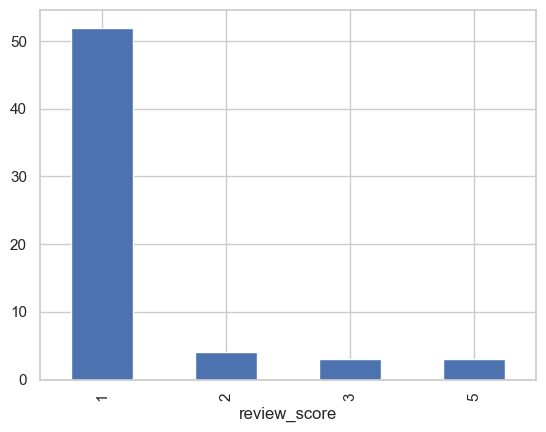

In [87]:
canceled_reviews['review_score'].value_counts().sort_index().plot(kind='bar')

Most of canceled order has bad reviews (1 stars) and canceled with 2, 3, 5 stars arround 3 to 5 reviews

### Pertanyaan 2:

<Axes: >

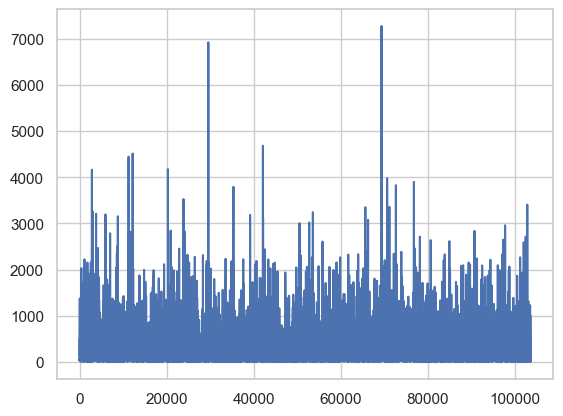

In [88]:
last_years_income['payment_value'].plot(kind='line')

In [89]:
last_years_income['payment_value'].describe()

count    55666.000000
mean       154.932882
std        210.412515
min          0.000000
25%         57.700000
50%        102.190000
75%        173.575000
max       7274.880000
Name: payment_value, dtype: float64

In [90]:
last_years_income['payment_value'].sum()

8624493.8

in 2018 total income is 8624493.8 with maximal payment is 7274.88 and minimal payment is 0 (with voucher)

### Pertanyaan 3:

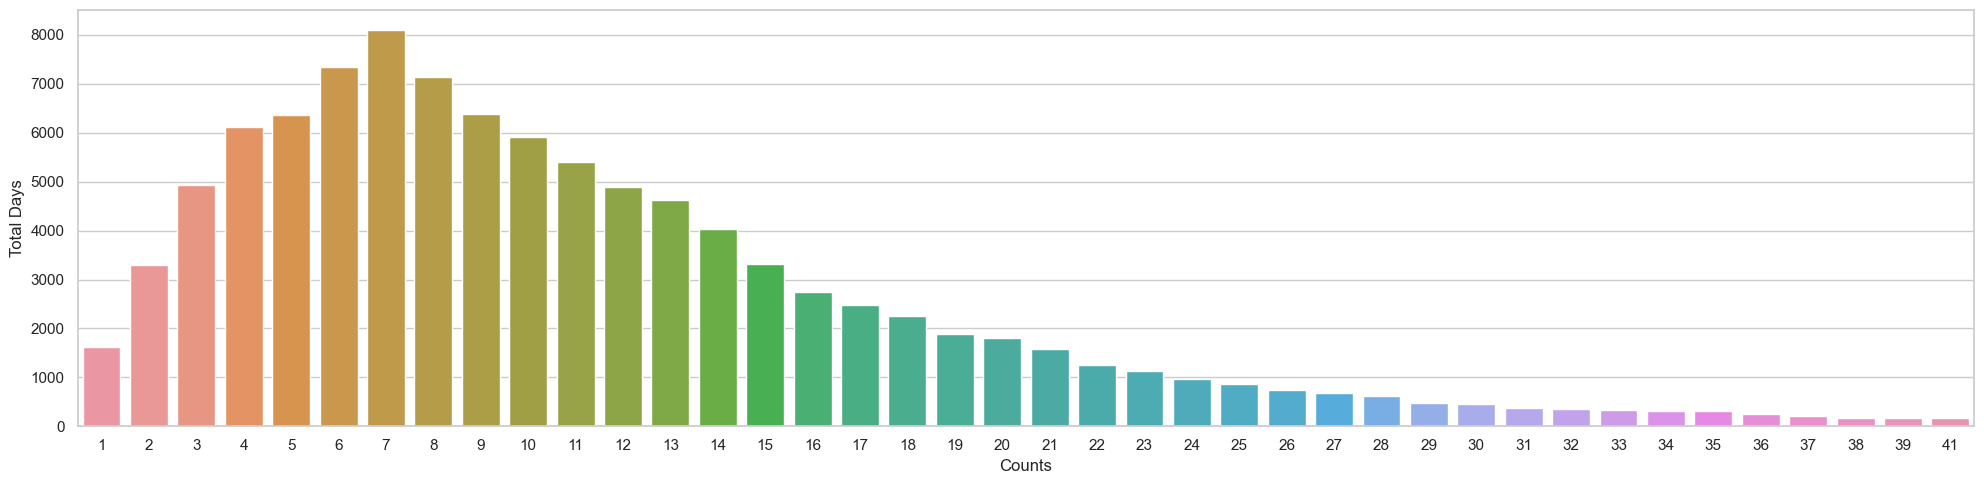

In [91]:
days_arrive = order_time_diff.apply(lambda x: x.days).value_counts().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.barplot(data=days_arrive.head(40), x='index', y='count', ax=ax)

plt.tight_layout()
plt.ylabel("Total Days")
plt.xlabel("Counts")

plt.show()
# days_arrive.head()

### Pertanyaan 4:

In [92]:
canceled_reviews[['review_comment_title', 'review_comment_message']].head()

,review_comment_title,review_comment_message
1786,Não recebi o produto,Comprei o produto e depois eles informaram que...
6046,Sem produto em estoque,Comprei e depois me avisaram que não tinha est...
9239,Aguardando a entrega,Fui comunicada do atraso!
9850,Insatisfação,"A empresa não deu retorno aos e-mail enviados,..."
10377,Sem comprometimento,"Sem previsão de recebimento, a lannister dever..."


<Axes: xlabel='review_score'>

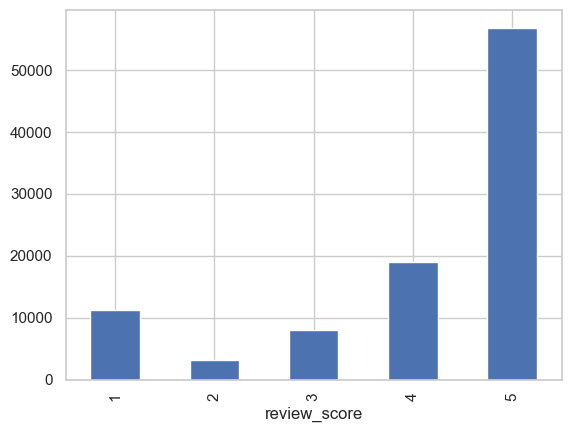

In [93]:
order_reviews_df_merge['review_score'].value_counts().sort_index().plot(kind='bar')

There is total reviews score, most score has 5 stars

### Pertanyaan 5:

In [94]:
products_df_merge['product_category_name_english'].value_counts().head(10)

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

<Axes: xlabel='product_category_name_english'>

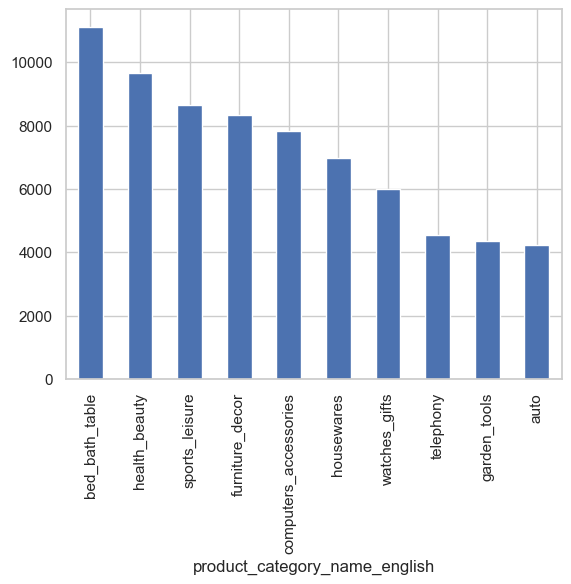

In [95]:
products_df_merge['product_category_name_english'].value_counts().head(10).plot(kind='bar')

based the table, top ten category ordered are:
| Category | Total Order |
|----------|-------------|
| bed_bath_table      |     11115 |
| health_beauty        |     9670 |
| sports_leisure       |     8641 |
| furniture_decor      |     8334 |
| computers_accessories|     7827 |
| housewares           |     6964 |
| watches_gifts        |     5991 |
| telephony            |     4545 |
| garden_tools         |     4347 |
| auto                 |     4235 |

### Pertanyaan 6:

<Axes: ylabel='customer_city'>

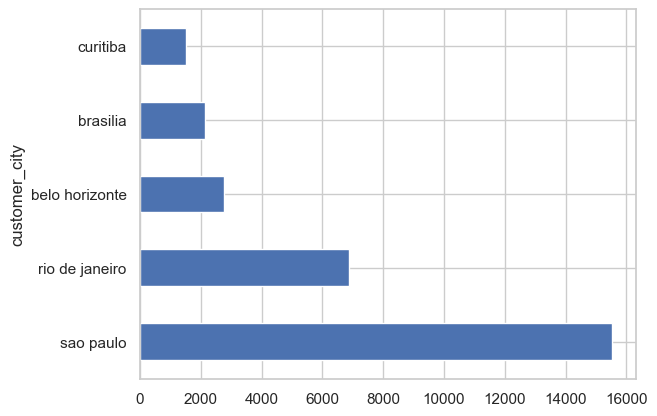

In [96]:
customers_df_merge['customer_city'].value_counts().sort_values(ascending=False).head().plot(kind='barh')

<Axes: ylabel='customer_state'>

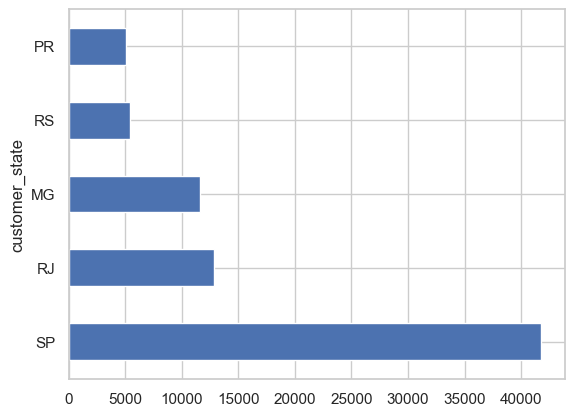

In [97]:
customers_df_merge['customer_state'].value_counts().sort_values(ascending=False).head().plot(kind='barh')

## Conclusion

Most customers ordered are in `SP/spain` State and most customers city `rio de Janeiro`. Top category ordered are `bed_bath_table`. The average rating for the store are 4, mostly have positif ratings. Total income for 2018 is `8624493.8 Real`